In [ ]:
# подключение к Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# # распаковка архива
# import zipfile
# import os

# # Путь к ZIP-архиву на Google Drive
# zip_path = '/content/drive/MyDrive/Data_Science/archive (3).zip'  # Замените на свой путь

# # Папка, куда распаковывать (можно создать новую)
# images = '/content/drive/MyDrive/Data_Science/image/'

# # Создаем папку, если её нет
# os.makedirs(images, exist_ok=True)

# # Распаковка
# with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#     zip_ref.extractall(images)

# print(f"Архив распакован в: {images}")

Архив распакован в: /content/drive/MyDrive/Data_Science/image/


In [21]:
# Определение устройства (GPU если доступно, иначе CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Используется устройство: {device}")

Используется устройство: cpu


In [11]:
import os

# Путь к папке с изображениями на Google Drive
dataset_path = '/content/drive/MyDrive/Data_Science/image/img_align_celeba/img_align_celeba'
image_files = os.listdir(dataset_path)[:10]  # Первые 10 файлов


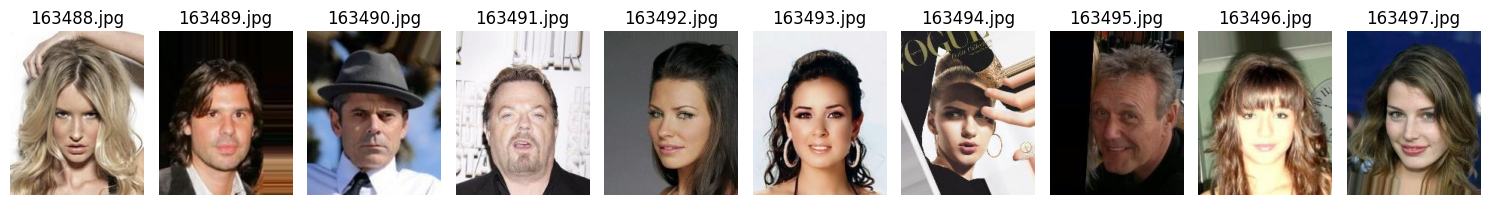

In [12]:
# просмотр первых 10 изображений
from PIL import Image
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
for i, img_file in enumerate(image_files, 1):
    img_path = os.path.join(dataset_path, img_file)
    try:
        img = Image.open(img_path)
        plt.subplot(1, 10, i)
        plt.imshow(img)
        plt.title(img_file)
        plt.axis('off')
    except Exception as e:
        print(f"Ошибка при загрузке {img_file}: {e}")

plt.tight_layout()
plt.show()

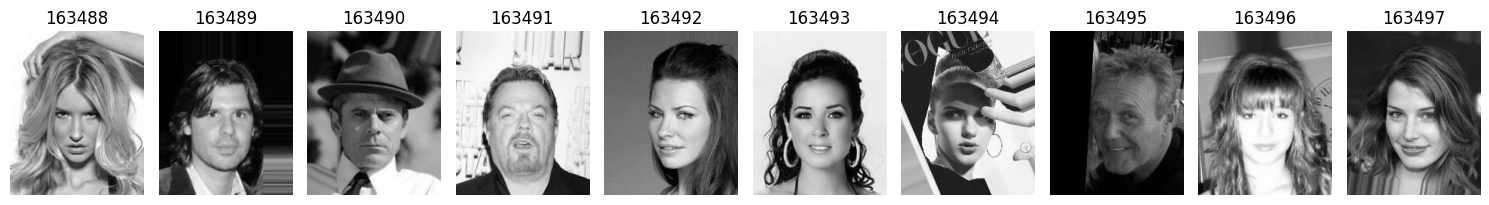

In [13]:
# Просмотр первых 10 изображений в черно-белом формате
from PIL import Image
import matplotlib.pyplot as plt
import os
plt.figure(figsize=(15, 5))
for i, img_file in enumerate(image_files[:10], 1):  # Берем только первые 10 файлов
    img_path = os.path.join(dataset_path, img_file)
    try:
        img = Image.open(img_path).convert('L')  # Конвертируем в grayscale
        plt.subplot(1, 10, i)
        plt.imshow(img, cmap='gray')  # Указываем цветовую карту 'gray'
        plt.title(os.path.splitext(img_file)[0])  # Показываем имя файла без расширения
        plt.axis('off')
    except Exception as e:
        print(f"Ошибка при загрузке {img_file}: {e}")

plt.tight_layout()
plt.show()

In [14]:
# сокращение датасета до 10 000 изображений и их конвертация в черно-белый формат, сохранение в новый датасет на google drive
import os
from PIL import Image
import shutil
from tqdm import tqdm

# Пути
original_dataset_path = '/content/drive/MyDrive/Data_Science/image/img_align_celeba/img_align_celeba'
new_dataset_path = '/content/drive/MyDrive/Data_Science/image/celeba_bw_10k'  # Новая папка для ЧБ изображений

# Создаем новую директорию, если ее нет
os.makedirs(new_dataset_path, exist_ok=True)

# Получаем список всех файлов (первые 10 000)
all_files = os.listdir(original_dataset_path)[:10000]

# Обрабатываем и сохраняем изображения
for filename in tqdm(all_files, desc='Converting to BW'):
    try:
        # Открываем и конвертируем в ЧБ
        img_path = os.path.join(original_dataset_path, filename)
        img = Image.open(img_path).convert('L')

        # Сохраняем в новую папку
        new_img_path = os.path.join(new_dataset_path, filename)
        img.save(new_img_path)

    except Exception as e:
        print(f"Error processing {filename}: {e}")

print(f"\nSuccessfully converted and saved {len(os.listdir(new_dataset_path))} BW images to {new_dataset_path}")

Converting to BW: 100%|██████████| 10000/10000 [58:14<00:00,  2.86it/s]


Successfully converted and saved 10000 BW images to /content/drive/MyDrive/Data_Science/image/celeba_bw_10k


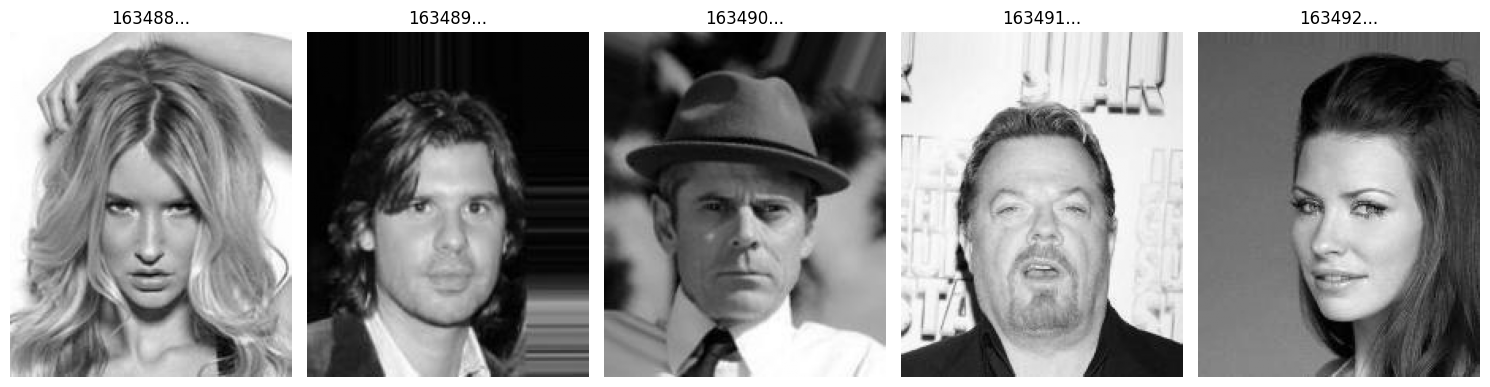

In [17]:
# Проверяем первые 5 изображений из нового датасета
new_image_files = os.listdir(new_dataset_path)[:5]

plt.figure(figsize=(15, 5))
for i, img_file in enumerate(new_image_files, 1):
    img_path = os.path.join(new_dataset_path, img_file)
    try:
        img = Image.open(img_path)
        plt.subplot(1, 5, i)
        plt.imshow(img, cmap='gray')
        plt.title(os.path.splitext(img_file)[0][:10] + "...")
        plt.axis('off')
    except Exception as e:
        print(f"Ошибка при загрузке {img_file}: {e}")

plt.tight_layout()
plt.show()

In [22]:
# проверка изображений на наличие ошибок
import os
from PIL import Image
from tqdm import tqdm

def validate_dataset(dataset_path, num_samples=None):
    """Проверяет датасет на целостность файлов и соответствие форматов"""
    files = [f for f in os.listdir(dataset_path) if f.lower().endswith(('.jpg', '.png'))]
    if num_samples:
        files = files[:num_samples]

    errors = []
    valid_count = 0

    for file in tqdm(files, desc="Проверка изображений"):
        try:
            img_path = os.path.join(dataset_path, file)
            with Image.open(img_path) as img:
                # Проверка режима изображения (должен быть 'L' для ч/б)
                if img.mode != 'L':
                    errors.append(f"{file}: не ч/б (режим {img.mode})")

                # Проверка размера
                if img.size != (48, 48):
                    errors.append(f"{file}: неверный размер {img.size}")

                # Попытка конвертации в тензор
                img_tensor = transforms.ToTensor()(img)
                if img_tensor.dim() != 3 or img_tensor.shape[0] != 1:
                    errors.append(f"{file}: неверная форма тензора {img_tensor.shape}")

            valid_count += 1
        except Exception as e:
            errors.append(f"{file}: ошибка загрузки - {str(e)}")

    print(f"\nРезультаты проверки ({len(files)} файлов):")
    print(f"Корректных: {valid_count}")
    print(f"Ошибок: {len(errors)}")

    if errors:
        print("\nПервые 5 ошибок:")
        for error in errors[:5]:
            print(error)

    return errors

# Использование
dataset_path = '/content/drive/MyDrive/Data_Science/image/celeba_bw_10k'
errors = validate_dataset(dataset_path, num_samples=1000)  # Проверить первые 1000 изображений

Проверка изображений: 100%|██████████| 1000/1000 [04:02<00:00,  4.12it/s] 


Результаты проверки (1000 файлов):
Корректных: 1000
Ошибок: 1000

Первые 5 ошибок:
163488.jpg: неверный размер (178, 218)
163489.jpg: неверный размер (178, 218)
163490.jpg: неверный размер (178, 218)
163491.jpg: неверный размер (178, 218)
163492.jpg: неверный размер (178, 218)


Используется 2 CPU ядер


Epoch 1: 100%|██████████| 188/188 [04:43<00:00,  1.51s/it]

Epoch 1 Loss: 0.3311


Test Loss: 0.3026


Epoch 2: 100%|██████████| 188/188 [00:45<00:00,  4.12it/s]

Epoch 2 Loss: 0.3083


Test Loss: 0.3013


Epoch 3: 100%|██████████| 188/188 [00:46<00:00,  4.01it/s]

Epoch 3 Loss: 0.3062


Test Loss: 0.3010


Epoch 4: 100%|██████████| 188/188 [00:51<00:00,  3.64it/s]

Epoch 4 Loss: 0.3053


Test Loss: 0.3006


Epoch 5: 100%|██████████| 188/188 [00:49<00:00,  3.79it/s]

Epoch 5 Loss: 0.3046


Test Loss: 0.3009


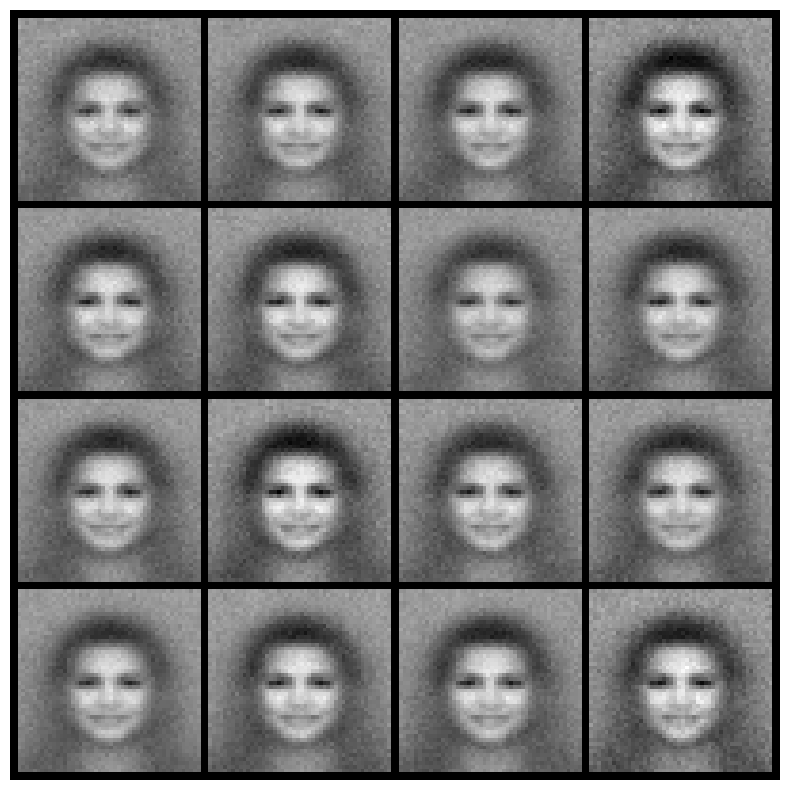

In [20]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.nn import functional as F
from torchvision import transforms
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt
import numpy as np
import torchvision
from PIL import Image
import os
from google.colab import drive
from tqdm import tqdm

# 1. Настройка окружения
torch.set_num_threads(2)
print(f"Используется {torch.get_num_threads()} CPU ядер")

# 2. Монтирование Google Drive
if not os.path.exists('/content/drive'):
    drive.mount('/content/drive')

# 3. Параметры
image_size = 48
batch_size = 32
latent_dim = 50
epochs = 5
learning_rate = 3e-4

# 4. Класс датасета
class FastCelebADataset(Dataset):
    def __init__(self, root_dir, transform=None, num_samples=None):
        self.root_dir = root_dir
        self.transform = transform or transforms.Compose([
            transforms.Resize((image_size, image_size)),
            transforms.Grayscale(),
            transforms.ToTensor(),
            transforms.Normalize((0.5,), (0.5,))
        ])
        self.files = [f for f in os.listdir(root_dir)
                     if f.lower().endswith('.jpg')][:num_samples]

    def __len__(self):
        return len(self.files)

    def __getitem__(self, idx):
        img_path = os.path.join(self.root_dir, self.files[idx])
        img = Image.open(img_path).convert('RGB')
        img = img.resize((image_size, image_size), Image.LANCZOS)
        return self.transform(img), 0

# 5. VAE архитектура
class LightVAE(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Flatten(),
            nn.Linear(48*48*1, 256),
            nn.ReLU(),
            nn.Linear(256, 64)
            )

        self.fc_mu = nn.Linear(64, latent_dim)
        self.fc_var = nn.Linear(64, latent_dim)

        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 256),
            nn.ReLU(),
            nn.Linear(256, 48*48*1),
            nn.Tanh()
        )

    def encode(self, x):
        h = self.encoder(x)
        return self.fc_mu(h), self.fc_var(h)

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5*logvar)
        eps = torch.randn_like(std)
        return mu + eps*std

    def decode(self, z):
        return self.decoder(z).view(-1, 1, 48, 48)

    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        return self.decode(z), mu, logvar

# 6. Инициализация
device = torch.device("cpu")
model = LightVAE().to(device)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# 7. DataLoader
dataset_path = '/content/drive/MyDrive/Data_Science/image/celeba_bw_10k'
transform = transforms.Compose([
    transforms.Resize(48),
    transforms.Grayscale(),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = FastCelebADataset(dataset_path, transform=transform, num_samples=6000)
test_dataset = FastCelebADataset(dataset_path, transform=transform, num_samples=1500)

train_loader = DataLoader(
    train_dataset,
    batch_size=batch_size,
    shuffle=True,
    num_workers=1
)

test_loader = DataLoader(
    test_dataset,
    batch_size=batch_size,
    shuffle=False,
    num_workers=1
)

# 8. Обучение
def train(epoch):
    model.train()
    train_loss = 0
    for data, _ in tqdm(train_loader, desc=f'Epoch {epoch}'):
        data = data.to(device)
        optimizer.zero_grad()
        recon_batch, mu, logvar = model(data)
        loss = F.mse_loss(recon_batch, data) + 0.5 * torch.mean(-0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp(), dim=1))
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    print(f"Epoch {epoch} Loss: {train_loss/len(train_loader):.4f}")

# 9. Запуск обучения
for epoch in range(1, epochs + 1):
    train(epoch)

    model.eval()
    test_loss = 0
    with torch.no_grad():
        for data, _ in test_loader:
            data = data.to(device)
            recon, _, _ = model(data)
            test_loss += F.mse_loss(recon, data).item()
    print(f"Test Loss: {test_loss/len(test_loader):.4f}")

# 10. Визуализация
with torch.no_grad():
    z = torch.randn(16, latent_dim).to(device)
    samples = model.decode(z)
    grid = torchvision.utils.make_grid(samples, nrow=4, normalize=True)
    plt.figure(figsize=(10,10))
    plt.imshow(grid.permute(1, 2, 0))
    plt.axis('off')
    plt.show()